In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

#--------
# consts

crnsLon, crnsLat = -109.955567, 47.059422

In [2]:
snodas_j15 = xr.open_dataset('../data/snodas/snodas_2021-0115.nc')
snodas_j21 = xr.open_dataset('../data/snodas/snodas_2021-0121.nc')
snodas_j22 = xr.open_dataset('../data/snodas/snodas_2021-0122.nc')
snodas_j29 = xr.open_dataset('../data/snodas/snodas_2021-0129.nc')
snodas_f17 = xr.open_dataset('../data/snodas/snodas_2021-0217.nc')
snodas_f18 = xr.open_dataset('../data/snodas/snodas_2021-0218.nc')
snodas_f24 = xr.open_dataset('../data/snodas/snodas_2021-0224.nc')
snodas_m04 = xr.open_dataset('../data/snodas/snodas_2021-0304.nc')

In [3]:
snodas_sd_j15 = xr.open_dataset('../data/snodas/snodas_sd_2021-0115.nc')
snodas_sd_j21 = xr.open_dataset('../data/snodas/snodas_sd_2021-0121.nc')
snodas_sd_j22 = xr.open_dataset('../data/snodas/snodas_sd_2021-0122.nc')
snodas_sd_j29 = xr.open_dataset('../data/snodas/snodas_sd_2021-0129.nc')
snodas_sd_f17 = xr.open_dataset('../data/snodas/snodas_sd_2021-0217.nc')
snodas_sd_f18 = xr.open_dataset('../data/snodas/snodas_sd_2021-0218.nc')
snodas_sd_f24 = xr.open_dataset('../data/snodas/snodas_sd_2021-0224.nc')
snodas_sd_m04 = xr.open_dataset('../data/snodas/snodas_sd_2021-0304.nc')

In [4]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(snodas_f17.lat-crnsLat)
abslon = np.abs(snodas_f17.lon-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))
# Now I can use that index location to get the values at the x/y diminsion

carc_snodas_j15 = snodas_j15.isel(lon=xloc, lat=yloc)
carc_snodas_j21 = snodas_j21.isel(lon=xloc, lat=yloc)
carc_snodas_j22 = snodas_j22.isel(lon=xloc, lat=yloc)
carc_snodas_j29 = snodas_j29.isel(lon=xloc, lat=yloc)
carc_snodas_f17 = snodas_f17.isel(lon=xloc, lat=yloc)
carc_snodas_f18 = snodas_f18.isel(lon=xloc, lat=yloc)
carc_snodas_f24 = snodas_f24.isel(lon=xloc, lat=yloc)
carc_snodas_m04 = snodas_m04.isel(lon=xloc, lat=yloc)

carc_snodas_sd_j15 = snodas_sd_j15.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j21 = snodas_sd_j21.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j22 = snodas_sd_j22.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j29 = snodas_sd_j29.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f17 = snodas_sd_f17.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f18 = snodas_sd_f18.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f24 = snodas_sd_f24.isel(lon=xloc, lat=yloc)
carc_snodas_sd_m04 = snodas_sd_m04.isel(lon=xloc, lat=yloc)

In [9]:
ucla_swe = xr.open_dataset('../data/wus_ucla_sr/WUS_UCLA_SR_v01_N47_0W110_0_agg_16_WY2020_21_SWE_SCA_POST.nc')
ucla_depth = xr.open_dataset('../data/wus_ucla_sr/WUS_UCLA_SR_v01_N47_0W110_0_agg_16_WY2020_21_SD_POST.nc')

In [10]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ucla_swe.Latitude-crnsLat)
abslon = np.abs(ucla_swe.Longitude-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))


# Now I can use that index location to get the values at the x/y diminsion
carc_wus = ucla_swe.isel(Longitude=slice(xloc, xloc+2), Latitude=slice(yloc-1,yloc+1))

In [11]:
carc_depths = ucla_depth.isel(Longitude=slice(xloc, xloc+2), Latitude=slice(yloc-1,yloc+1))

In [18]:
ua_4km_swe = xr.open_dataset('../data/ua_4km_swe/4km_SWE_Depth_WY2021_v01.nc')

In [19]:
# 112 - j21
# 113 - j22
# 120 - j29
# 139 - f17
# 140 - f18
# 146 - f24
# 154 - m04

In [22]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ua_4km_swe.lat-crnsLat)
abslon = np.abs(ua_4km_swe.lon-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))
# Now I can use that index location to get the values at the x/y diminsion
carc_u4k = ua_4km_swe.isel(lon=xloc, lat=yloc)

In [24]:
carc_u4k

<xarray.Dataset>
Dimensions:   (time: 365, time_str_len: 11)
Coordinates:
    lat       float32 47.04
    lon       float32 -110.0
  * time      (time) datetime64[ns] 2020-10-01 2020-10-02 ... 2021-09-30
Dimensions without coordinates: time_str_len
Data variables:
    crs       |S1 ...
    time_str  (time_str_len, time) |S1 ...
    SWE       (time) float32 ...
    DEPTH     (time) float32 ...

In [25]:
carc_u4k.sel(time='2021-01-15')

<xarray.Dataset>
Dimensions:   (time_str_len: 11)
Coordinates:
    lat       float32 47.04
    lon       float32 -110.0
    time      datetime64[ns] 2021-01-15
Dimensions without coordinates: time_str_len
Data variables:
    crs       |S1 ...
    time_str  (time_str_len) |S1 ...
    SWE       float32 ...
    DEPTH     float32 ...

In [26]:
# array([47.      , 47.041668, 47.083332]
# array([-110.      , -109.958336, -109.916664], dtype=float32)

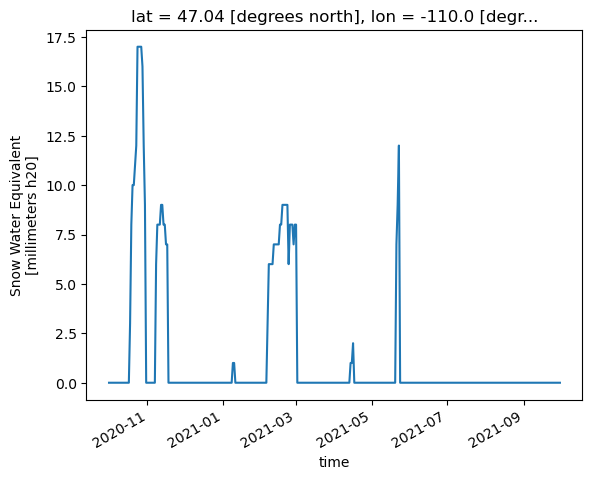

In [27]:
carc_u4k.SWE.plot()
# plt.plot(-109.955567, 47.059422, 'ro')

In [28]:
sd1 = carc_depths.mean(dim=["Longitude", "Latitude"]).isel(Stats=0).to_pandas()
sd2 = carc_u4k.DEPTH.to_pandas()

In [29]:
sd2 = sd2.reset_index()
sd2.index.name = 'Day'

In [30]:
sd2.columns = ['Time', 'SD UA [mm]']

In [31]:
sds = sd2.join(sd1)

In [32]:
sds['SD UA [m]'] = sds['SD UA [mm]']/1000

In [33]:
uw_sd = pd.DataFrame(
    {'carc_dowy':[106, 112, 113, 120, 139, 140, 146, 154],
     'sd [m]':[0.0009416359999999998,0.016401694000000005,0.0197357636,0.008898735999999999,0.0787415496,0.075809294,0.021657748399999996,0.0130767216],
     'sd std [m]':[0.015382485548294984,
                   0.03805179432261196,
                   0.03727467892557782,
                   0.03188966838840291,
                   0.07599655069929648,
                   0.0763905110765831,
                   0.06071239652428734,
                   0.04000171659561741]})

In [34]:
sds['SD UA [cm]'] = sds['SD UA [mm]']/10
sds['SD_Post [cm]'] = sds['SD_Post']*100

In [35]:
uw_sd['sd [cm]'] = uw_sd['sd [m]']*100
uw_sd['sd std [cm]'] = uw_sd['sd std [m]']*100

In [37]:
w_sds = pd.read_csv('../w_sd.csv')

In [38]:
w_sds = w_sds.drop(['Unnamed: 0'], axis=1)

In [39]:
w_sds = w_sds*100
w_sds.melt()

,variable,value
0,106,0.296265
1,106,0.055277
2,106,0.062786
3,106,0.021158
4,106,0.005401
...,...,...
203,154,1.212645
204,154,0.865895
205,154,0.867143
206,154,1.888075


In [41]:
swe1 = carc_wus.mean(dim=["Longitude", "Latitude"]).isel(Stats=0).to_pandas()
swe2 = carc_u4k.SWE.to_pandas()

In [42]:
swe1['SWE ucla [mm]'] = swe1['SWE_Post']*1000

In [43]:
swe2 = swe2.reset_index()
swe2.index.name = 'Day'

In [44]:
swe2.columns = ['time', 'SWE UA [mm]']

In [45]:
swes = swe2.join(swe1)

In [46]:
carc_avg_swe_cm = [0.530504098566071, 0.637230009292796,0.327047373752602,1.09127963950704,1.05802546834056,0.755550068249541,0.572121540796448]
carc_dowy = [112, 113, 120, 139, 140, 146, 154]
carc_dowy2 = [106, 112, 113, 120, 139, 140, 146, 154]

In [47]:
carc_lidar_swe = pd.DataFrame({
    'Day':carc_dowy,
    'SWE [cm]': carc_avg_swe_cm
})

In [48]:
carc_lidar_swe['SWE [mm]'] = carc_lidar_swe['SWE [cm]']*10

In [49]:
snodas_swe = [int(carc_snodas_j15.Band1.values),
              int(carc_snodas_j21.Band1.values),
              int(carc_snodas_j22.Band1.values),
              int(carc_snodas_j29.Band1.values),
              int(carc_snodas_f17.Band1.values),
              int(carc_snodas_f18.Band1.values),
              int(carc_snodas_f24.Band1.values),
              int(carc_snodas_m04.Band1.values)]

In [50]:
snodas_sd = [int(carc_snodas_sd_j15.Band1.values),
              int(carc_snodas_sd_j21.Band1.values),
              int(carc_snodas_sd_j22.Band1.values),
              int(carc_snodas_sd_j29.Band1.values),
              int(carc_snodas_sd_f17.Band1.values),
              int(carc_snodas_sd_f18.Band1.values),
              int(carc_snodas_sd_f24.Band1.values),
              int(carc_snodas_sd_m04.Band1.values)]

In [52]:
ncdf_boxplot = pd.read_csv('../ncdf_boxplot.csv')

In [53]:
swes_plot = pd.read_csv('../swes_long.csv')
swes_plot

,DOWY,value,data
0,112,4.035826,model
1,112,4.393586,model
2,112,2.757278,model
3,112,4.314930,model
4,112,2.969672,model
...,...,...,...
359,154,5.221555,lidar
360,154,3.728285,lidar
361,154,3.732622,lidar
362,154,8.132893,lidar


In [56]:
crns = pd.read_csv('../data/crns_daily_swe_adjusted.csv', parse_dates=['UTC'])

In [57]:
crns['dowy'] = np.abs((pd.to_datetime('2020-10-01') - crns['UTC']).dt.days)

In [58]:
crns['swe [mm]'] = crns['swe_ms']*10

In [59]:
crns_data = crns[crns['UTC'].isin(['2021-01-21',
                       '2021-01-22',
                       '2021-01-29',
                       '2021-02-17',
                       '2021-02-18',
                       '2021-02-24',
                       '2021-03-04'])]

/var/folders/33/s6sv9bl94b5gdyb7kzhmyjlr0000gq/T/ipykernel_49667/428215491.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  crns_data = crns[crns['UTC'].isin(['2021-01-21',


In [60]:
crns_data['SWE [mm]'] = crns_data['swe_ms']*10

/var/folders/33/s6sv9bl94b5gdyb7kzhmyjlr0000gq/T/ipykernel_49667/1581208926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crns_data['SWE [mm]'] = crns_data['swe_ms']*10


In [61]:
crns_data['dowy'] = [112, 113, 120, 139, 140, 146, 154]

/var/folders/33/s6sv9bl94b5gdyb7kzhmyjlr0000gq/T/ipykernel_49667/688536034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crns_data['dowy'] = [112, 113, 120, 139, 140, 146, 154]


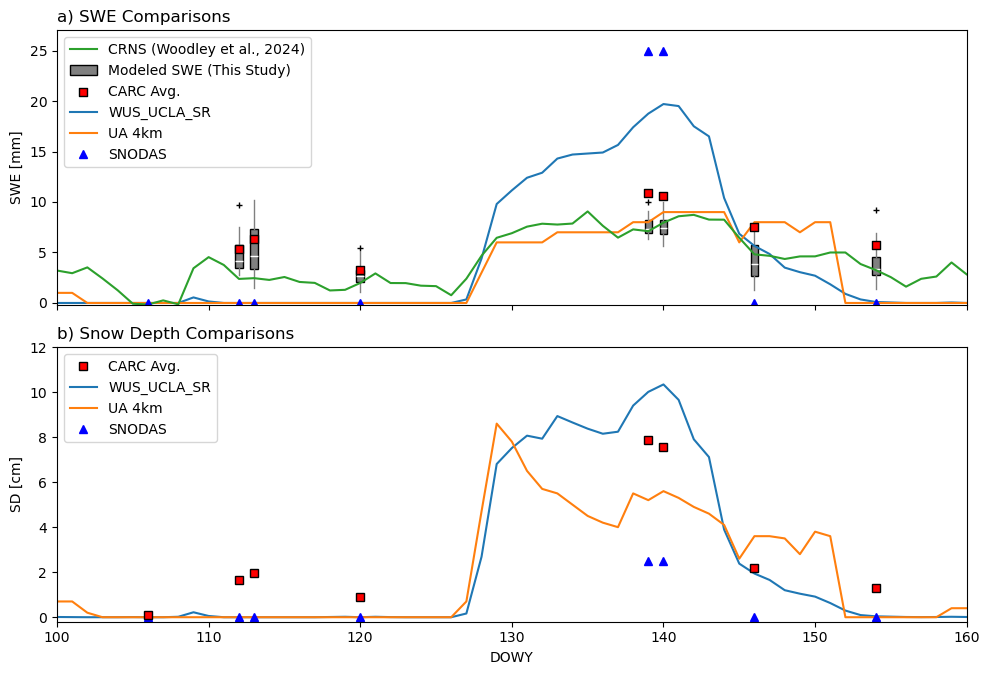

In [66]:
fig = plt.figure(figsize=(10,7))

gs = fig.add_gridspec(2,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)


crns.plot(ax=ax1, x='dowy', y='swe [mm]', color='tab:green', label='CRNS (Woodley et al., 2024)')
ncdf_boxplot.boxplot(ax=ax1, 
                     column='SWE [mm]', by='Date',
                     positions=[112,113,120,139,140,146,154],
                     zorder=1, patch_artist=True,grid=False,
                     boxprops={'facecolor':'grey'},
                     whiskerprops={'color':'grey'},
                     flierprops={'marker':'+', 'markersize':5, 'color':'grey'},
                     medianprops={'color':'white'}, showcaps=False, label='Modeled SWE (This Study)')
carc_lidar_swe.plot.scatter(ax=ax1, x='Day', y='SWE [mm]', marker='s',
                            s=30, color='red', zorder=2, edgecolor='k', label='CARC Avg.')
swes.plot(ax=ax1, y='SWE ucla [mm]', zorder=1, label='WUS_UCLA_SR', color='tab:blue')
swes.plot(ax=ax1, y='SWE UA [mm]', zorder=1, label='UA 4km', color='tab:orange')
ax1.plot(carc_dowy2, snodas_swe, 'b^', label='SNODAS')

ax1.axis([100,160,-0.2,27])
ax1.set_xticks([100,110,120,130,140,150,160], [100,110,120,130,140,150,160])
# handles, labels = ax.get_legend_handles_labels()
# new_labels = ['URANOS', 'lidar (fpt., weighted)', 'lidar (CARC, unweighted)', 'WUS_UCLA_SR', 'UA 4 km', 'SNODAS']
# ax.legend(handles, new_labels, loc='upper left', title='Data')
ax1.legend(loc='upper left')
# ax.set_xlabel('DOWY')
# ax.set_grid('off')
# ax.set_xticks([100,105,110,115,120,125,130,135,140,145,150,155,160], [100,'',110,'',120,'',130,'',140,'',150,'',160])
ax1.set_title('')
ax1.set_title('a) SWE Comparisons', loc='left')
fig.suptitle('')

#             native_scale=True, label='lidar (fpt., weighted)', color='#66c2a5')
ax2.plot(uw_sd.carc_dowy, uw_sd['sd [cm]'], 'rs', markeredgecolor='k', markersize=6, label='CARC Avg.', zorder=4)

sds.plot(ax=ax2, y='SD_Post [cm]', zorder=2, label='WUS_UCLA_SR', color='tab:blue')
sds.plot(ax=ax2, y='SD UA [cm]', zorder=2, label='UA 4km', color='tab:orange')
ax2.plot(carc_dowy2, [x/10 for x in snodas_swe], 'b^', label='SNODAS')

ax2.axis([100,160,-0.2,12])
ax2.grid(False)
ax2.legend(loc='upper left')
ax2.set_xlabel('DOWY')
ax2.set_ylabel('SD [cm]')
# ax.set_xticks([100,105,110,115,120,125,130,135,140,145,150,155,160], [100,'',110,'',120,'',130,'',140,'',150,'',160])
ax2.set_title('b) Snow Depth Comparisons', loc='left')
fig.suptitle('')

plt.tight_layout()
# plt.savefig('./figs/to_publish/f8.png', bbox_inches='tight', facecolor='w', dpi=300)